In [1]:
# Read libraries.
import pandas as pd
import matplotlib.pyplot as plt

# Best subset.
from best_subset import best_subset


In [2]:
# Open data.
data = pd.read_csv('data.csv')

data.head(5)

,state_po,D12,D16,bach2016,bach_white2016,538_2016_avg,Manuf_Constr
0,AL,0.387838,0.356259,0.247,0.273,0.334540,0.208
1,AK,0.426847,0.416143,0.296,0.367,0.353876,0.117
2,AZ,0.453866,0.481100,0.289,0.353,0.423319,0.152
3,AR,0.378456,0.357149,0.224,0.240,0.344622,0.204
4,CA,0.618728,0.661282,0.329,0.431,0.556942,0.154


In [3]:
# Remove state labels and get target.
states = data.pop('state_po')
y = data.pop('D16')

# Best subset class inserts intercept term when needed.

In [4]:
# Define and fit models.
model_subsets = best_subset(data, y)
model_subsets.fit()

# Iterate through resulting list of models.
all = []
for sub_list in model_subsets.models:
    all.extend(sub_list)
df = pd.DataFrame(all)
df.head(5)

,variables,no. vars,betas,rss,best
0,[],0,[0.4703084968315168],0.587604,1
1,[D12],1,"[-0.015086127218086498, 0.9875588589336478]",0.064155,0
2,[bach2016],1,"[0.018167603570839408, 1.4827208410201316]",0.310689,0
3,[bach_white2016],1,"[0.01740429227141968, 1.3405878657355406]",0.241647,0
4,[538_2016_avg],1,"[-0.07038039338869401, 1.3001079823434658]",0.037546,1


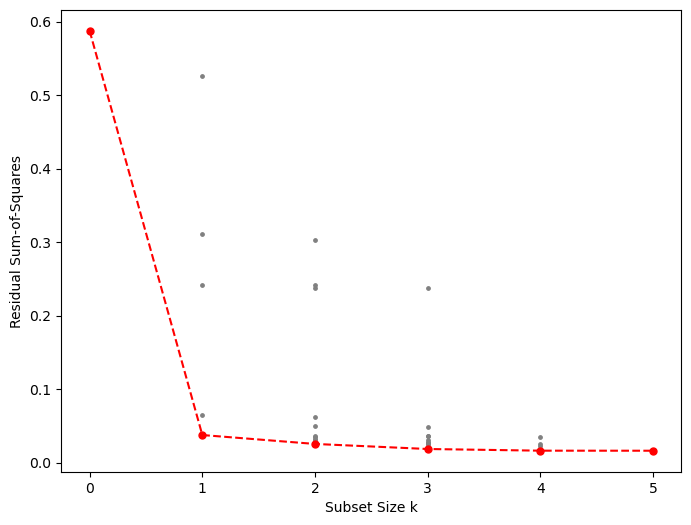

In [5]:
# Performance of each model.
fig = plt.figure(figsize=(8,6))

best_mask = df['best'] == 1
best = df[best_mask]
not_best = df[~best_mask]

plt.scatter(not_best['no. vars'], not_best['rss'], color='grey', s=6)
plt.plot(best['no. vars'], best['rss'], 'o--', color='red', markersize=5)

plt.xlabel('Subset Size k')
plt.ylabel('Residual Sum-of-Squares')
plt.show()